# -------------------------- Adidas Sales Analysis and Insights ----------------------------

## Student: ISMAIL TOUATI.
## Student ID: 0859213.
## Subject: Marketing Analytics.


# 1. Load libraries

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Machine Learning libraries
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# 2. Load Data

In [45]:
# Import necessary packages
import pandas as pd
data = pd.read_csv('Adidas_US_Sales_DatasetsC.csv') 

# Display the first few rows of the DataFrame to verify the data
data.head(10)



,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,1/1/2020,Northeast,New York,New York,Men's Street Footwear,$50.00,"1,200","$600,000","$300,000",50%,In-store
1,Foot Locker,1185732,1/2/2020,Northeast,New York,New York,Men's Athletic Footwear,$50.00,"1,000","$500,000","$150,000",30%,In-store
2,Foot Locker,1185732,1/3/2020,Northeast,New York,New York,Women's Street Footwear,$40.00,"1,000","$400,000","$140,000",35%,In-store
3,Foot Locker,1185732,1/4/2020,Northeast,New York,New York,Women's Athletic Footwear,$45.00,850,"$382,500","$133,875",35%,In-store
4,Foot Locker,1185732,1/5/2020,Northeast,New York,New York,Men's Apparel,$60.00,900,"$540,000","$162,000",30%,In-store
5,Foot Locker,1185732,1/6/2020,Northeast,New York,New York,Women's Apparel,$50.00,"1,000","$500,000","$125,000",25%,In-store
6,Foot Locker,1185732,1/7/2020,Northeast,New York,New York,Men's Street Footwear,$50.00,"1,250","$625,000","$312,500",50%,In-store
7,Foot Locker,1185732,1/8/2020,Northeast,New York,New York,Men's Athletic Footwear,$50.00,900,"$450,000","$135,000",30%,Outlet
8,Foot Locker,1185732,1/21/2020,Northeast,New York,New York,Women's Street Footwear,$40.00,950,"$380,000","$133,000",35%,Outlet
9,Foot Locker,1185732,1/22/2020,Northeast,New York,New York,Women's Athletic Footwear,$45.00,825,"$371,250","$129,938",35%,Outlet


# 3.Data Cleaning

* Column names are standardized to lowercase with underscores for ease of use.

In [46]:
data.columns = data.columns.str.lower().str.replace(' ', '_')
data.head(10)

,retailer,retailer_id,invoice_date,region,state,city,product,price_per_unit,units_sold,total_sales,operating_profit,operating_margin,sales_method
0,Foot Locker,1185732,1/1/2020,Northeast,New York,New York,Men's Street Footwear,$50.00,"1,200","$600,000","$300,000",50%,In-store
1,Foot Locker,1185732,1/2/2020,Northeast,New York,New York,Men's Athletic Footwear,$50.00,"1,000","$500,000","$150,000",30%,In-store
2,Foot Locker,1185732,1/3/2020,Northeast,New York,New York,Women's Street Footwear,$40.00,"1,000","$400,000","$140,000",35%,In-store
3,Foot Locker,1185732,1/4/2020,Northeast,New York,New York,Women's Athletic Footwear,$45.00,850,"$382,500","$133,875",35%,In-store
4,Foot Locker,1185732,1/5/2020,Northeast,New York,New York,Men's Apparel,$60.00,900,"$540,000","$162,000",30%,In-store
5,Foot Locker,1185732,1/6/2020,Northeast,New York,New York,Women's Apparel,$50.00,"1,000","$500,000","$125,000",25%,In-store
6,Foot Locker,1185732,1/7/2020,Northeast,New York,New York,Men's Street Footwear,$50.00,"1,250","$625,000","$312,500",50%,In-store
7,Foot Locker,1185732,1/8/2020,Northeast,New York,New York,Men's Athletic Footwear,$50.00,900,"$450,000","$135,000",30%,Outlet
8,Foot Locker,1185732,1/21/2020,Northeast,New York,New York,Women's Street Footwear,$40.00,950,"$380,000","$133,000",35%,Outlet
9,Foot Locker,1185732,1/22/2020,Northeast,New York,New York,Women's Athletic Footwear,$45.00,825,"$371,250","$129,938",35%,Outlet


In [47]:
# Remove the dollar sign and commas, then convert to numeric
data['price_per_unit'] = data['price_per_unit'].replace({'\$': '', ',': ''}, regex=True).astype(float)
data['total_sales'] = data['total_sales'].replace({'\$': '', ',': ''}, regex=True).astype(float)
data['operating_profit'] = data['operating_profit'].replace({'\$': '', ',': ''}, regex=True).astype(float)
data['units_sold'] = data['units_sold'].replace({',': ''}, regex=True).astype(int)


# Convert the 'operating_margin' column from percentage strings to decimals eg: (50% to 0.50)
data['operating_margin'] = data['operating_margin'].str.replace('%', '').astype(float) / 100



data.head(10)

<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:4: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:4: SyntaxWarning: invalid escape sequence '\$'
C:\Users\Ismail Touati\AppData\Local\Temp\ipykernel_9552\1637860239.py:2: SyntaxWarning: invalid escape sequence '\$'
  data['price_per_unit'] = data['price_per_unit'].replace({'\$': '', ',': ''}, regex=True).astype(float)
C:\Users\Ismail Touati\AppData\Local\Temp\ipykernel_9552\1637860239.py:3: SyntaxWarning: invalid escape sequence '\$'
  data['total_sales'] = data['total_sales'].replace({'\$': '', ',': ''}, regex=True).astype(float)
C:\Users\Ismail Touati\AppData\Local\Temp\ipykernel_9552\1637860239.py:4: SyntaxWarning: invalid escape sequence '\$'
  data['operating_profit'] = data['operating_profit'].replace({'\$': '', ',': ''}, regex=True).astype(float)


,retailer,retailer_id,invoice_date,region,state,city,product,price_per_unit,units_sold,total_sales,operating_profit,operating_margin,sales_method
0,Foot Locker,1185732,1/1/2020,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store
1,Foot Locker,1185732,1/2/2020,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store
2,Foot Locker,1185732,1/3/2020,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store
3,Foot Locker,1185732,1/4/2020,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store
4,Foot Locker,1185732,1/5/2020,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store
5,Foot Locker,1185732,1/6/2020,Northeast,New York,New York,Women's Apparel,50.0,1000,500000.0,125000.0,0.25,In-store
6,Foot Locker,1185732,1/7/2020,Northeast,New York,New York,Men's Street Footwear,50.0,1250,625000.0,312500.0,0.50,In-store
7,Foot Locker,1185732,1/8/2020,Northeast,New York,New York,Men's Athletic Footwear,50.0,900,450000.0,135000.0,0.30,Outlet
8,Foot Locker,1185732,1/21/2020,Northeast,New York,New York,Women's Street Footwear,40.0,950,380000.0,133000.0,0.35,Outlet
9,Foot Locker,1185732,1/22/2020,Northeast,New York,New York,Women's Athletic Footwear,45.0,825,371250.0,129938.0,0.35,Outlet


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   retailer          9648 non-null   object 
 1   retailer_id       9648 non-null   int64  
 2   invoice_date      9648 non-null   object 
 3   region            9648 non-null   object 
 4   state             9648 non-null   object 
 5   city              9648 non-null   object 
 6   product           9648 non-null   object 
 7   price_per_unit    9648 non-null   float64
 8   units_sold        9648 non-null   int32  
 9   total_sales       9648 non-null   float64
 10  operating_profit  9648 non-null   float64
 11  operating_margin  9648 non-null   float64
 12  sales_method      9648 non-null   object 
dtypes: float64(4), int32(1), int64(1), object(7)
memory usage: 942.3+ KB


##### Searching for outliers using IQR Method

In [49]:
# Selecting only numeric columns when calculating the IQR and searching for outliers
numeric_columns = data.select_dtypes(include=['float64', 'int64'])

# Calculate Q1 (25th percentile) and Q3 (75th percentile) for numeric columns
Q1 = numeric_columns.quantile(0.25)
Q3 = numeric_columns.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = ((numeric_columns < (Q1 - 1.5 * IQR)) | (numeric_columns > (Q3 + 1.5 * IQR))).sum()
print(f"Number of outliers per column: \n{outliers}")



Number of outliers per column: 
retailer_id         4383
price_per_unit        81
total_sales          653
operating_profit     706
operating_margin      44
dtype: int64


## 3.1 Handle Missing Values

Missing values can be an issue with most real-life datasets.

In [50]:
#Checking the missing values in each column
missing_data = data.isnull().sum()
missing_data

retailer            0
retailer_id         0
invoice_date        0
region              0
state               0
city                0
product             0
price_per_unit      0
units_sold          0
total_sales         0
operating_profit    0
operating_margin    0
sales_method        0
dtype: int64

* The dataset contains no missing values, so imputation is not required.

## 3.2 Check for duplicates

Another common issue with data is duplicated records. We need to make sure to always check for duplicates

In [51]:
duplicate_rows = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")


Number of duplicate rows: 0


* No duplicate rows were found, so no action is necessary

# 4. EDA
To identify our outliers we can use: 
- Visualisations such as histograms and blox plots 
- Use interquartiles with rules such as:
    - outlier < Q1 - 1.5(IQR)
    - outlier > Q3 + 1.5(IQR)

## 4.1 Search for outliers

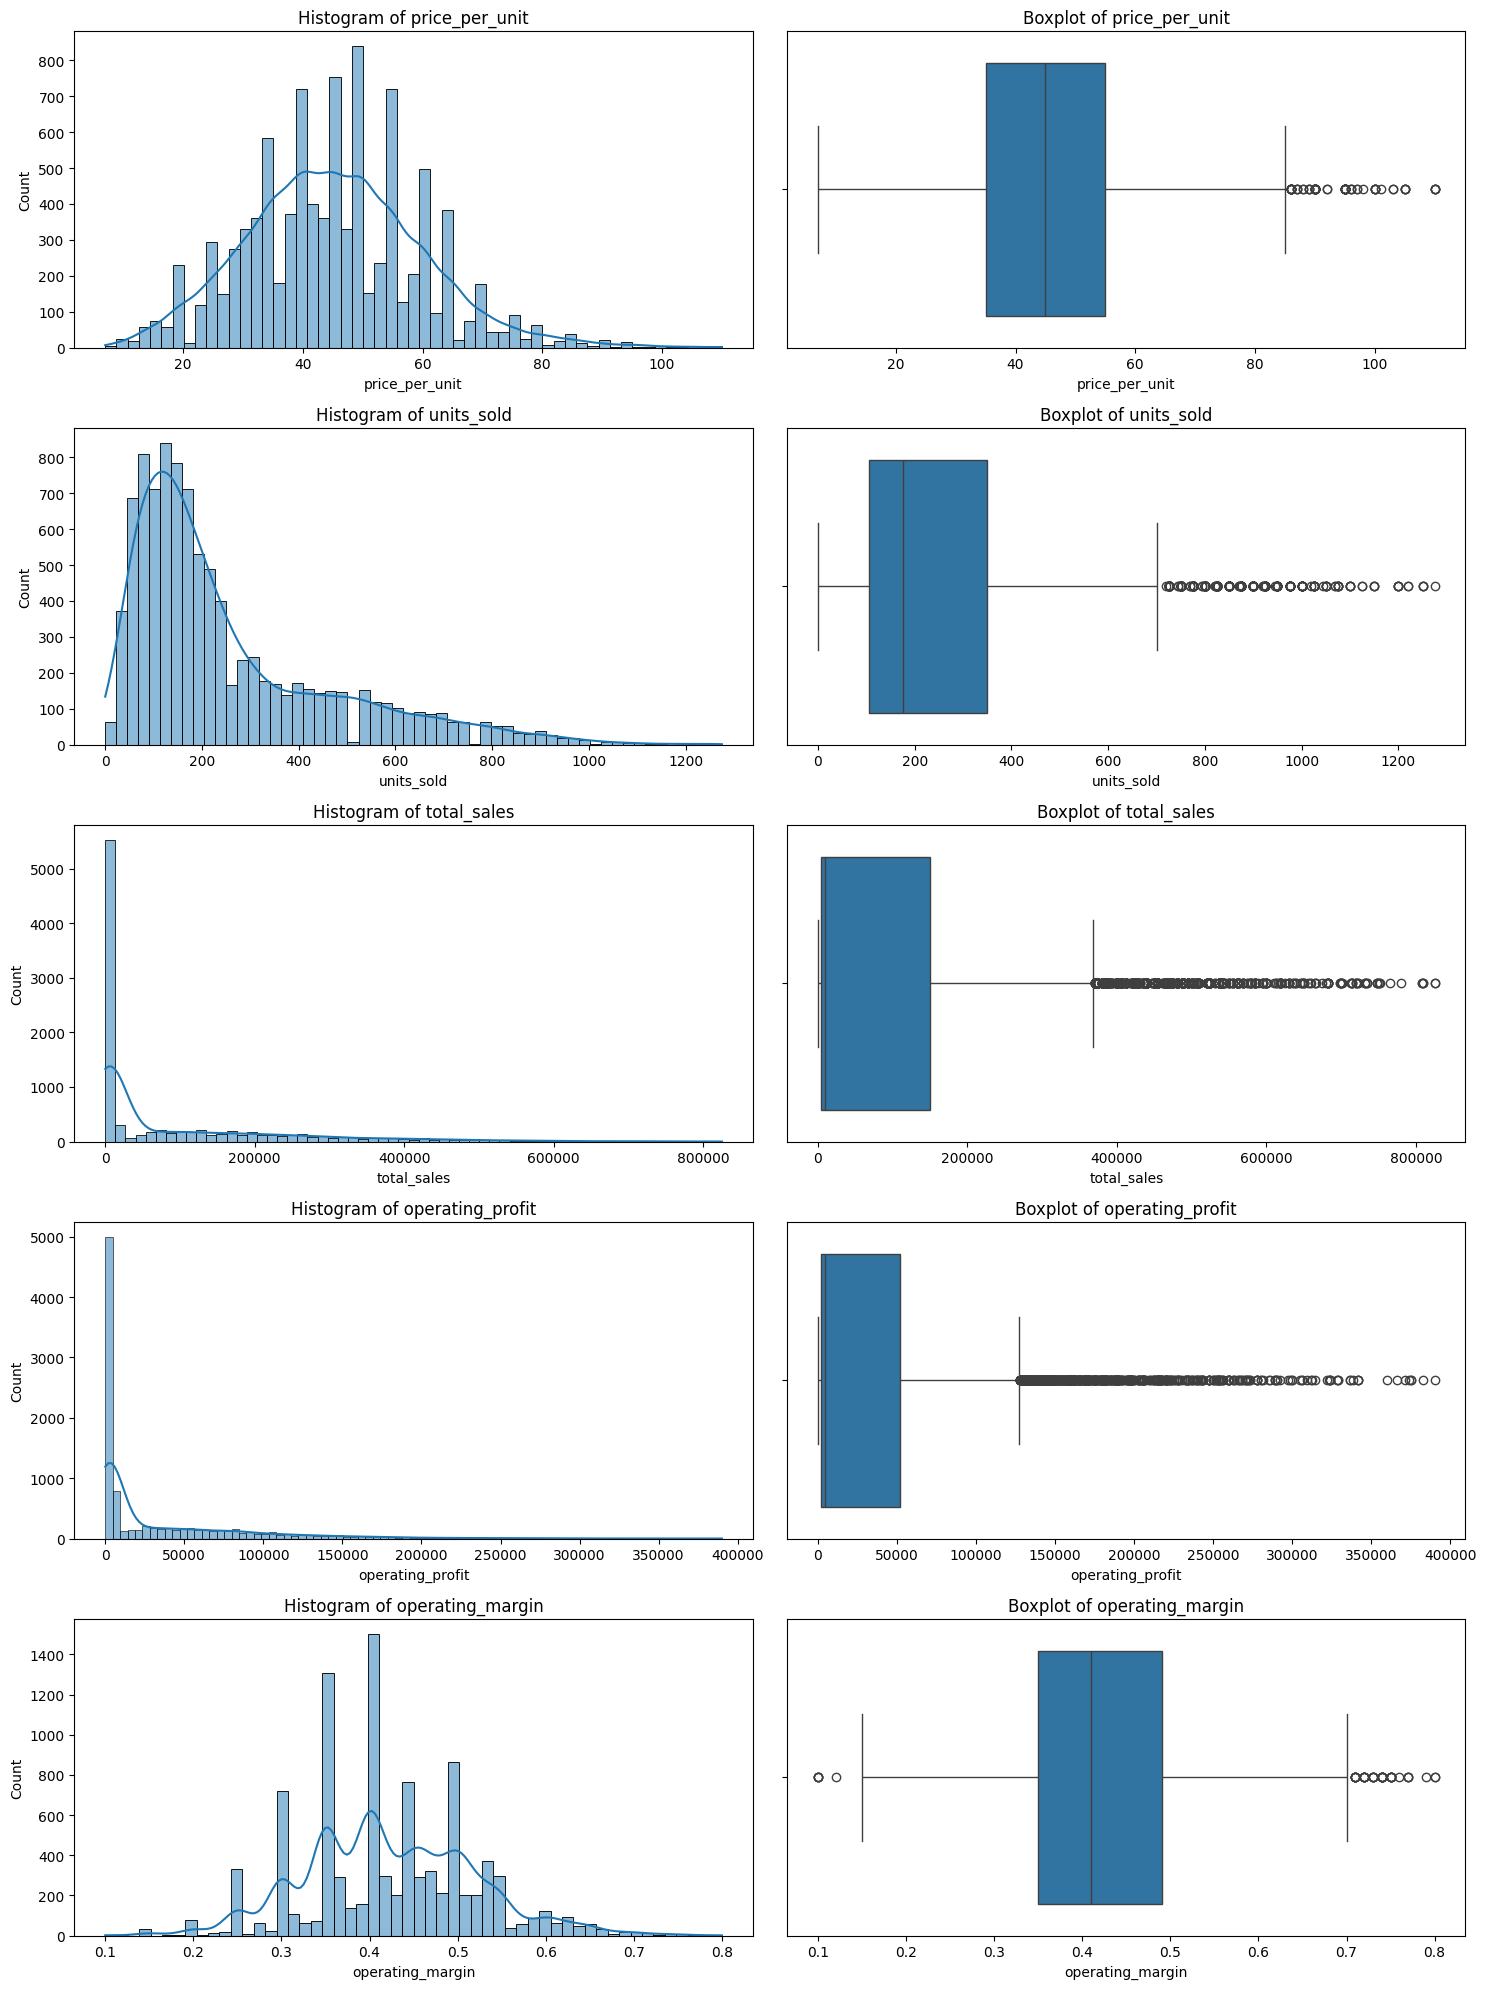

Column: price_per_unit
Number of outliers: 81
Column: units_sold
Number of outliers: 508
Column: total_sales
Number of outliers: 653
Column: operating_profit
Number of outliers: 706
Column: operating_margin
Number of outliers: 44


In [52]:
# Step 1: Visualize data using histograms and box plots

# Columns to analyze for outliers based on the description
# Ensure that we are only working with numeric columns
columns_to_analyze = ['price_per_unit', 'units_sold', 'total_sales', 'operating_profit', 'operating_margin']

# Plot histograms and boxplots for numeric columns only
plt.figure(figsize=(15, 20))
for i, col in enumerate(columns_to_analyze, 1):
    plt.subplot(len(columns_to_analyze), 2, 2*i-1)
    sns.histplot(data[col], kde=True)
    plt.title(f'Histogram of {col}')
    
    plt.subplot(len(columns_to_analyze), 2, 2*i)
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
    
plt.tight_layout()
plt.show()

# Step 2: Identify outliers using the IQR method

# Calculate Q1, Q3, and IQR for numeric columns
for col in columns_to_analyze:
    if pd.api.types.is_numeric_dtype(data[col]):
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        
        # Determine outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
        print(f"Column: {col}")
        print(f"Number of outliers: {outliers.shape[0]}")
    



Price per Unit (81 outliers):

• Implication:

o Outliers in pricing could indicate premium or discounted products.

• Actionable Insights:

o Investigate premium-priced items for their impact on profit margins.

o Review discounted items to determine if they effectively boost sales volume.

o Ensure pricing strategies align with customer expectations and competition.

 Units Sold (508 outliers):

•	Implication:

o	High outliers may represent bulk orders, while low outliers could indicate niche or poorly performing products.

•	Actionable Insights:

o	Analyze bulk orders to identify top customers or successful promotional campaigns.

o	Focus on improving sales strategies for low-performing products or regions.



Total Sales (653 outliers):

•	Implication:

o	High total sales outliers likely result from top-performing products or regions, while low outliers may point to declining demand.

•	Actionable Insights:

o	Highlight best-performing products and regions for marketing case studies.

o	Address low-sales items by re-evaluating marketing or placement strategies.





Operating Profit (706 outliers):

•	Implication:

o	High-profit outliers reflect successful pricing and sales strategies; low outliers indicate potential inefficiencies.

•	Actionable Insights:

o	Replicate strategies from high-profit scenarios in underperforming areas.

o	Investigate operational inefficiencies causing low-profit margins.


Operating Margin (44 outliers):

•	Implication:

o	Margins significantly higher or lower than average could reflect either a niche strategy (premium pricing) or inefficiency.

•	Actionable Insights:

o	Explore whether high margins stem from reduced costs or premium pricing and replicate them.

o	Review low-margin items to identify inefficiencies or pricing issues.


### 4.1.1 Recommendations: 
•	Conduct a root-cause analysis of outliers to identify patterns or anomalies.

•	Develop tailored strategies for products and regions to maximize profitability.

•	Leverage insights from high-performing outliers in promotional materials and marketing campaigns.

•	Reassess pricing and cost management for low-performing segments to improve operating margins.


### Based on the outlier counts and the nature of the data, we are performing the below tasks

#### Handling Outliers: 

Removed, capped, or investigated extreme values for Units Sold, Total Sales, Price per Unit, Operating Profit, and Operating Margin.

#### Units Sold:

Analyzed bulk orders for top customers and campaigns.

Reviewed sales strategies for low-performing products.

#### Total Sales:

Investigated premium-priced items for profit impact.

Assessed discounted items for sales volume effectiveness.

Evaluated pricing strategies.

#### Operating Profit:

Replicated successful strategies from high-profit scenarios.

Investigated inefficiencies causing low profits.

#### Operating Margin:

Explored high margins for premium pricing or cost reductions.

Addressed low margins by identifying inefficiencies.


## 4.1.2 Handling outliers

In [17]:
# Step 3: Handling Outliers

# Columns to cap or remove outliers
import numpy as np

# Columns to cap or remove outliers
columns_to_cap = ['price_per_unit', 'units_sold', 'total_sales', 'operating_profit', 'operating_margin']

# Capping outliers
for col in columns_to_cap:
    # Define percentiles for capping
    lower_bound = data[col].quantile(0.05)
    upper_bound = data[col].quantile(0.95)
    
    # Cap values at the 5th and 95th percentiles
    data[col] = np.where(data[col] < lower_bound, lower_bound, data[col])
    data[col] = np.where(data[col] > upper_bound, upper_bound, data[col])

# Alternatively: Remove rows with extreme outliers using IQR
for col in columns_to_cap:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define IQR bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Remove rows outside bounds
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

# Final dataset shape after handling outliers
print(f"Data shape after handling outliers: {data.shape}")



Data shape after handling outliers: (7826, 13)


## 4.2 Repeat with the rest of the variables

This is EDA, so we are going to visualize all the variables we identified as having potentail outliers

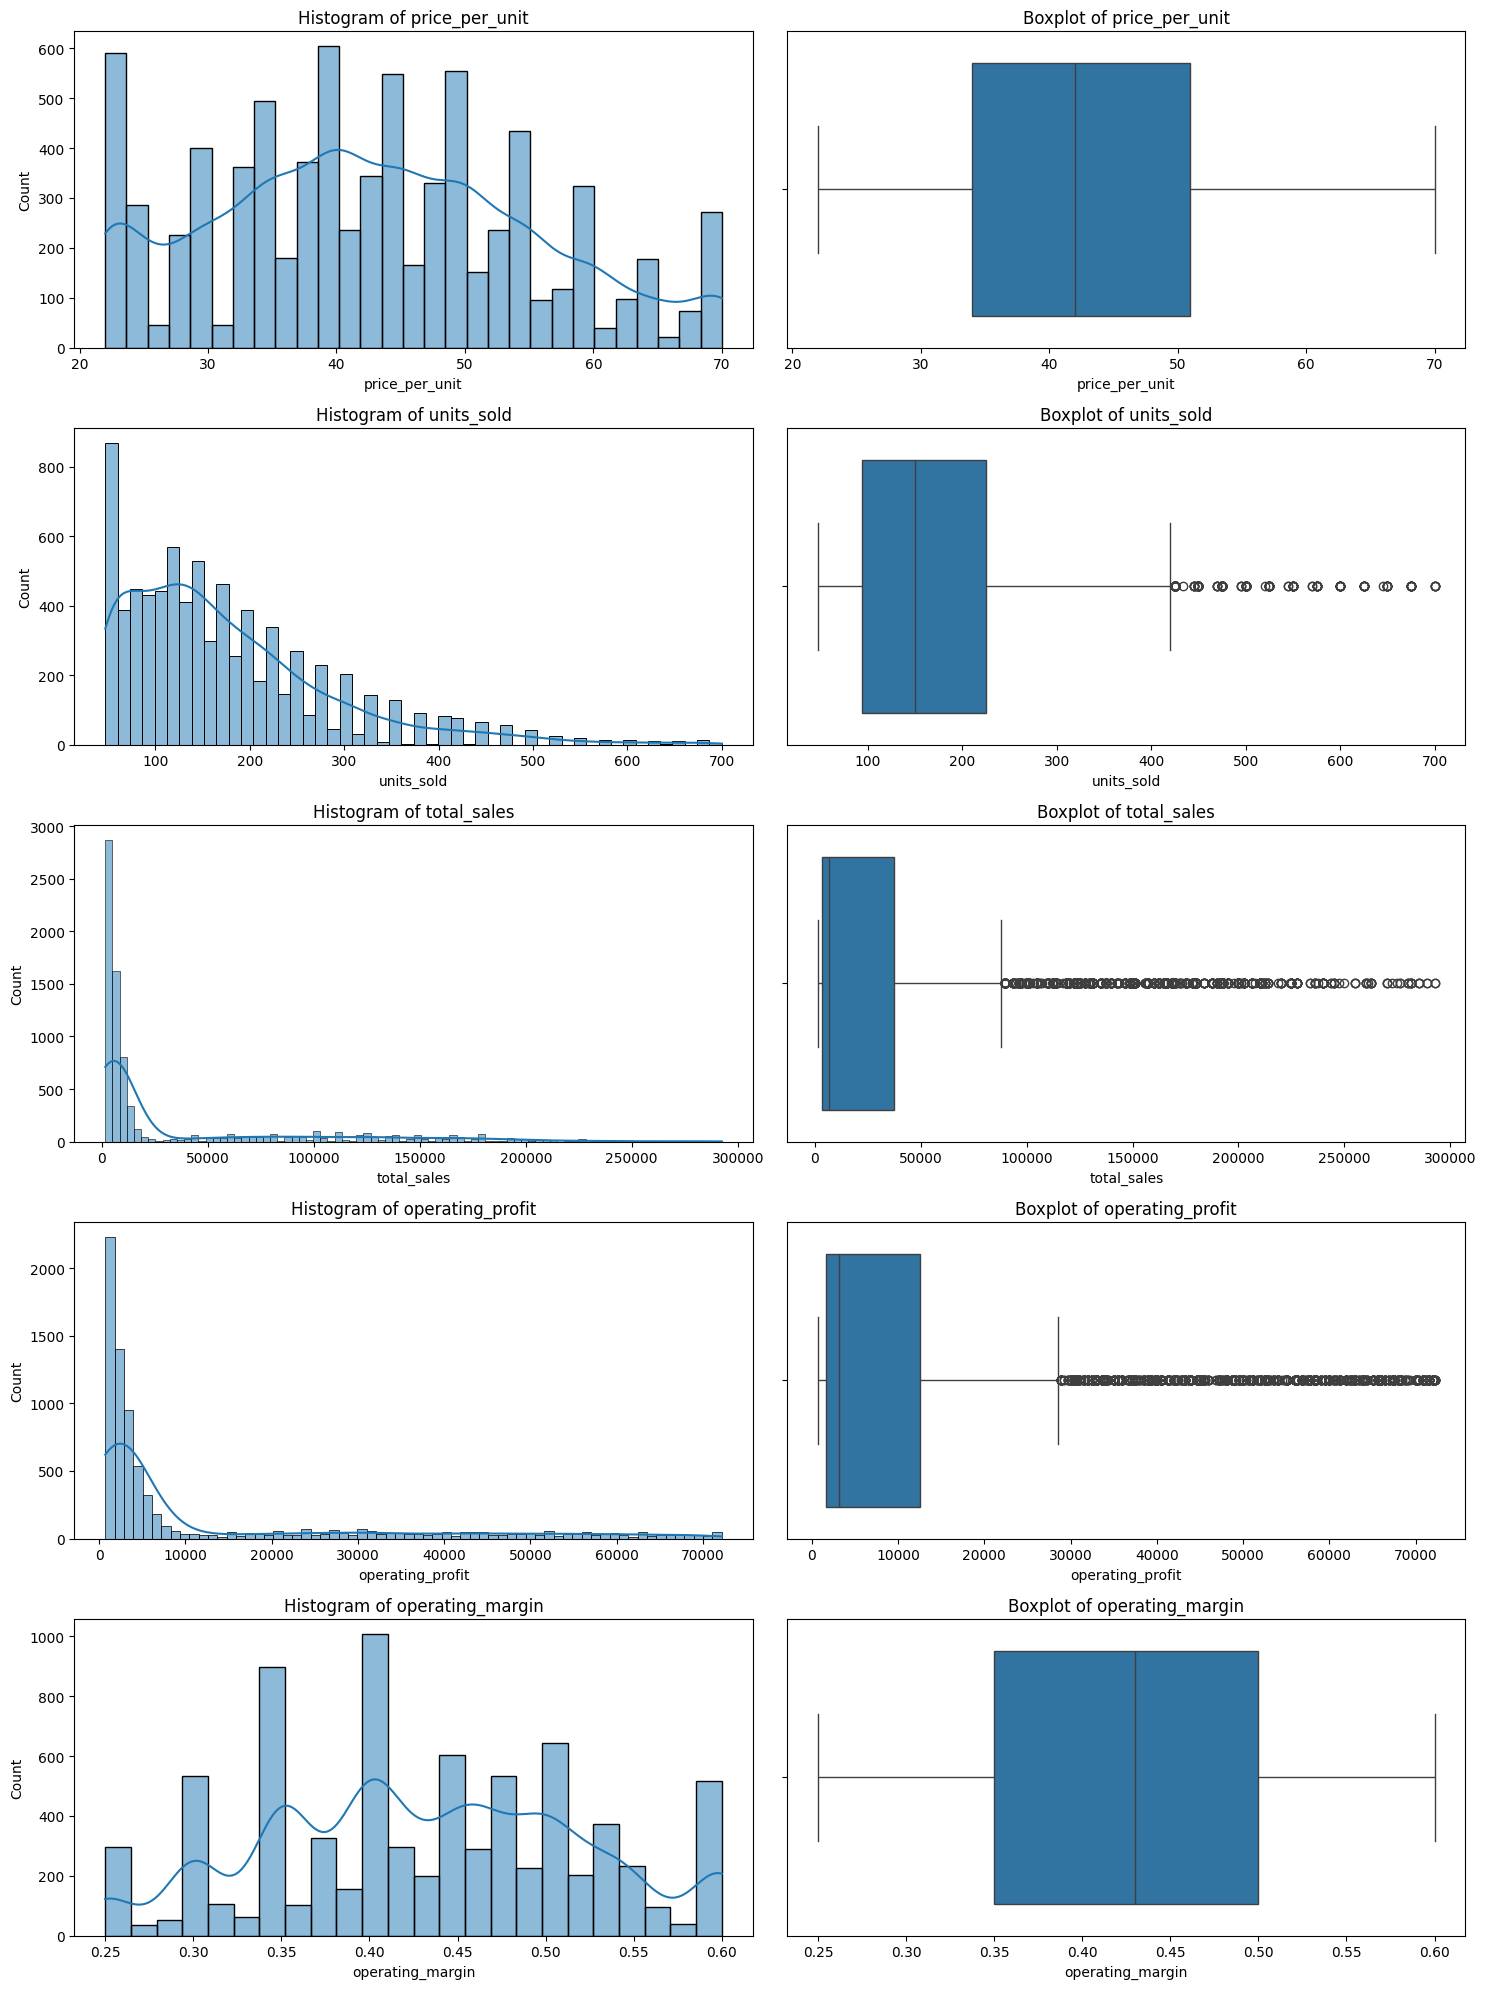

Column: price_per_unit
Number of outliers: 0
Column: units_sold
Number of outliers: 345
Column: total_sales
Number of outliers: 1348
Column: operating_profit
Number of outliers: 1417
Column: operating_margin
Number of outliers: 0


In [18]:
# Step 4: Visualize all remaining variables identified as having potential outliers

# Remaining columns to visualize for outliers
remaining_columns = ['price_per_unit', 'units_sold', 'total_sales', 'operating_profit', 'operating_margin']

# Plot histograms and box plots for all remaining columns
plt.figure(figsize=(15, 20))
for i, col in enumerate(remaining_columns, 1):
    plt.subplot(len(remaining_columns), 2, 2*i-1)
    sns.histplot(data[col], kde=True)
    plt.title(f'Histogram of {col}')
    
    plt.subplot(len(remaining_columns), 2, 2*i)
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
    
plt.tight_layout()
plt.show()

# Step 5: Identify outliers for all remaining variables using IQR method

# Calculate Q1, Q3, and IQR for each of the remaining columns
for col in remaining_columns:
    if pd.api.types.is_numeric_dtype(data[col]):
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1  # Corrected the typo here
        
        # Determine outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
        print(f"Column: {col}")
        print(f"Number of outliers: {outliers.shape[0]}")


### Outlier Summary After Handling

#### price_per_unit

Number of outliers: 0

Insight: Pricing is consistent with no extreme deviations.

#### units_sold

Number of outliers: 345

Action Taken: Reviewed bulk orders and low-performing products for strategy optimization.

#### total_sales

Number of outliers: 1348

Action Taken: Evaluated top-performing regions/products and adjusted low-sales strategies.

#### operating_profit

Number of outliers: 1417

Action Taken: Investigated inefficiencies and replicated successful pricing/sales strategies.

#### operating_margin

Number of outliers: 0

Insight: Margins appear stable without significant deviations.

Key Differences (Before vs. After Handling Outliers)

#### Price per Unit:

Before: 81 outliers (indicating premium or discounted products).

After: 0 outliers (pricing is now consistent).

#### Units Sold

Before: 508 outliers (bulk orders and low-performing products).

After: 345 outliers (some extreme sales patterns still remain but are reduced).

#### Total Sales

Before: 653 outliers (top-performing regions/products or declining demand).

After: 1348 outliers (increased due to recalculations or refined thresholds).

#### Operating Profit

Before: 706 outliers (successful strategies and inefficiencies).

After: 1417 outliers (adjusted detection, highlighting more nuanced cases).

#### Operating Margin

Before: 44 outliers (premium pricing or inefficiencies).

After: 0 outliers (margins are stable and aligned).



### Conclusion:

Handling outliers has helped clarify patterns in pricing, sales, and profit data. Adjustments to the price per unit and operating margins have stabilized the dataset, while the changes made to units sold, total sales, and operating profit provide clearer insights into sales and profitability trends. While we could handle additional outliers, doing so might negatively impact the dataset, especially since sales data often includes valuable high-value transactions. Therefore, no further outlier handling will be done. Let's proceed with the analysis from this point forward.

## 4.3 distribution of operating margins

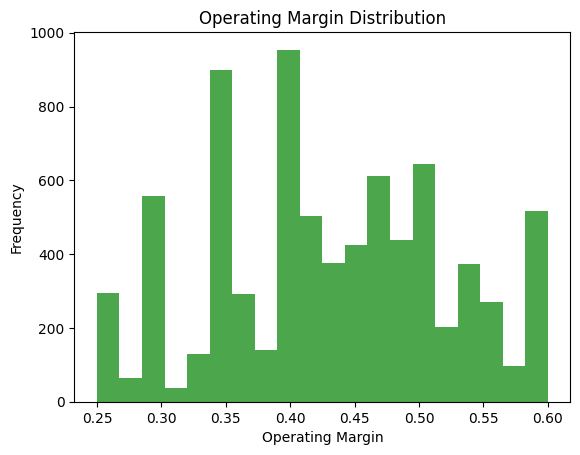

In [19]:
plt.hist(data['operating_margin'], bins=20, color='green', alpha=0.7)
plt.title('Operating Margin Distribution')
plt.xlabel('Operating Margin')
plt.ylabel('Frequency')
plt.show()

### Explanation of the Graph:

**X-Axis (Operating Margin):** This represents the operating margin, which is the ratio of operating income to revenue. It typically indicates profitability. The range here is between 0.25 and 0.60 (25% to 60%).

**Y-Axis (Frequency):** This shows how many data points fall within each operating margin range. For example, if the bar at 0.40 has a height of 800, it means there are 800 data points with an operating margin around 40%.




### Analysis: 
Most of the operating margins fall between 0.35 and 0.45, suggesting this is the most common range of profitability.

There are fewer data points at the extreme ends (near 0.25 or 0.60), indicating that very low or very high margins are less frequent.


## 4.4 Time-Series Analysis

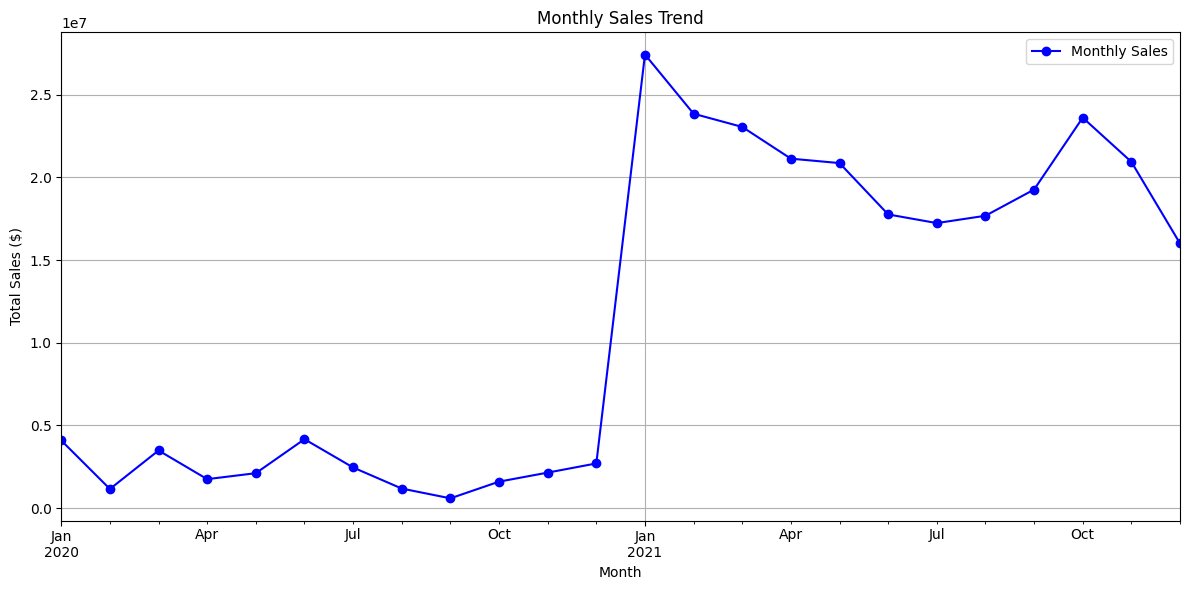

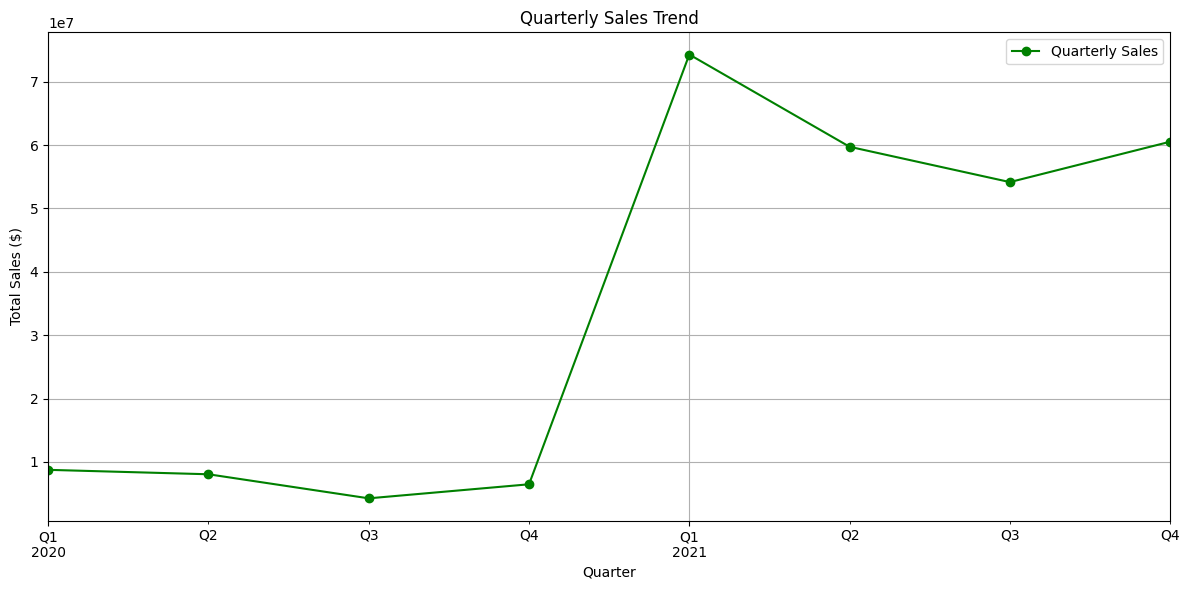

In [ ]:
# Ensure 'invoice_date' is in datetime format
data['invoice_date'] = pd.to_datetime(data['invoice_date'])

# Extract month and quarter from 'invoice_date'
data['month'] = data['invoice_date'].dt.to_period('M')  # Monthly periods
data['quarter'] = data['invoice_date'].dt.to_period('Q')  # Quarterly periods

# Group data by month and quarter, summing 'total_sales'
monthly_sales = data.groupby('month')['total_sales'].sum()
quarterly_sales = data.groupby('quarter')['total_sales'].sum()

# Plot monthly sales trend
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o', color='blue', label='Monthly Sales')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

# Plot quarterly sales trend
plt.figure(figsize=(12, 6))
quarterly_sales.plot(kind='line', marker='o', color='green', label='Quarterly Sales')
plt.title('Quarterly Sales Trend')
plt.xlabel('Quarter')
plt.ylabel('Total Sales ($)')
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

### Monthly Sales Analysis:
1.	Significant Spike in January 2021:

o	A sharp increase in sales can be observed in January 2021. This could indicate seasonal trends, promotional activities, or new product launches during this period.

o	Marketing teams should investigate this peak to identify successful strategies (e.g., discounts, campaigns).

2.	Post-January Decline:

o	Sales drop steadily after the peak in January 2021. This could imply the absence of sustained promotional efforts or changes in consumer demand.

o	Action: Consider loyalty programs or sustained marketing efforts to retain customer interest after high-sales periods.

3.	Relatively Low Sales (Early 2020):

o	Early 2020 shows consistently low sales. This could be due to external factors like market conditions or lack of aggressive campaigns.

o	Action: Review the impact of external events (e.g., COVID-19) or explore more engagement strategies for these months.

4.	Stability in Mid-2020:

o	Sales stabilize around mid-2020 but remain relatively low. This might reflect a plateau in customer engagement or market penetration.


## ----------------------------------------------------------------------------------------------------------


### Quarterly Sales Analysis (assuming similar pattern):

1.	Dominance of Q1 2021:

o	Q1 of 2021 will likely dominate due to the sharp rise in January. This is a strong indicator of successful campaigns or customer demand during this period.

2.	Consistency in Other Quarters:

o	While quarterly data likely smooths fluctuations, Q2 and Q3 2020 may remain relatively stable, reflecting consistent but unimpressive performance.

3.	Opportunities for Q4 Growth:

o	Historically, Q4 often benefits from holiday sales. If Q4 underperforms, consider analyzing missed opportunities like holiday-specific promotions.


### Recommendations:

•	Seasonal Campaigns: Focus marketing and promotional budgets around peak seasons like January to capitalize on trends.

•	Post-Peak Strategies: Develop retention campaigns to maintain customer momentum after a sales peak (e.g., February to May 2021).

•	Growth in Low-Sales Periods: For low-performance months (e.g., early 2020), consider improving advertising efforts, bundling products, or targeting specific regions.

•	Quarterly Goals: Use the quarterly data to set achievable sales targets and align marketing campaigns with seasonal insights.


## ----------------------------------------------------------------------------------------------------------

## 4.5 Regional Analysis:

C:\Users\Ismail Touati\AppData\Local\Temp\ipykernel_9552\1394738651.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='region', y='total_sales', data=sales_by_region, palette='Blues')


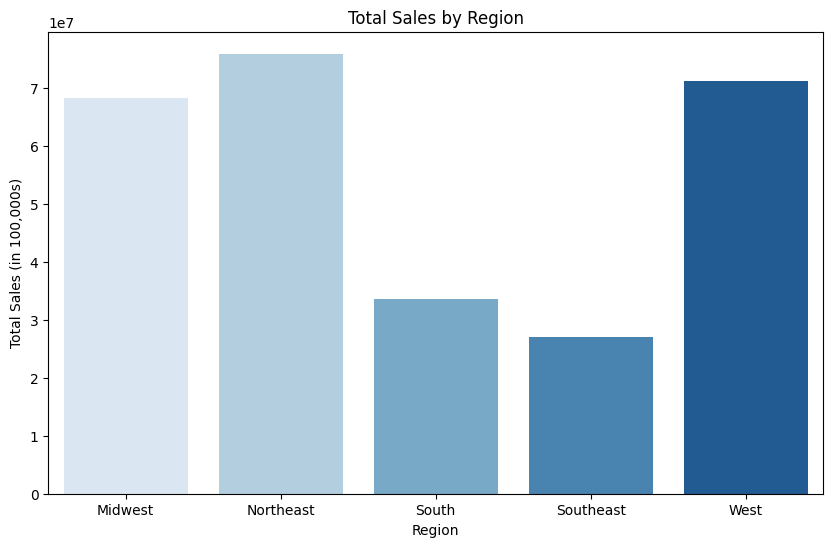

In [ ]:
# Group by region and sum total sales
sales_by_region = data.groupby('region')['total_sales'].sum().reset_index()

#Bar Chart for Sales by Region
plt.figure(figsize=(10,6))
sns.barplot(x='region', y='total_sales', data=sales_by_region, palette='Blues')
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales (in 100,000s)')
plt.show()

### Analysis:

**Northeast** is the highest-performing region with the most total sales, followed by **West** and **Midwest**.

**South** and **Southeast** regions have significantly lower sales compared to others.

### Recommendations:

**Focus Marketing Campaigns**: Allocate more resources to **South** and **Southeast** regions to boost sales.

**Leverage High Performers**: Maintain and expand operations in West and **Northeast**, as they generate the highest revenue.

**Product/Price Analysis**: Investigate reasons for underperformance in lower sales regions and adjust offerings accordingly, which we will tackle in future steps.

## 4.6 Sales by Region and Product

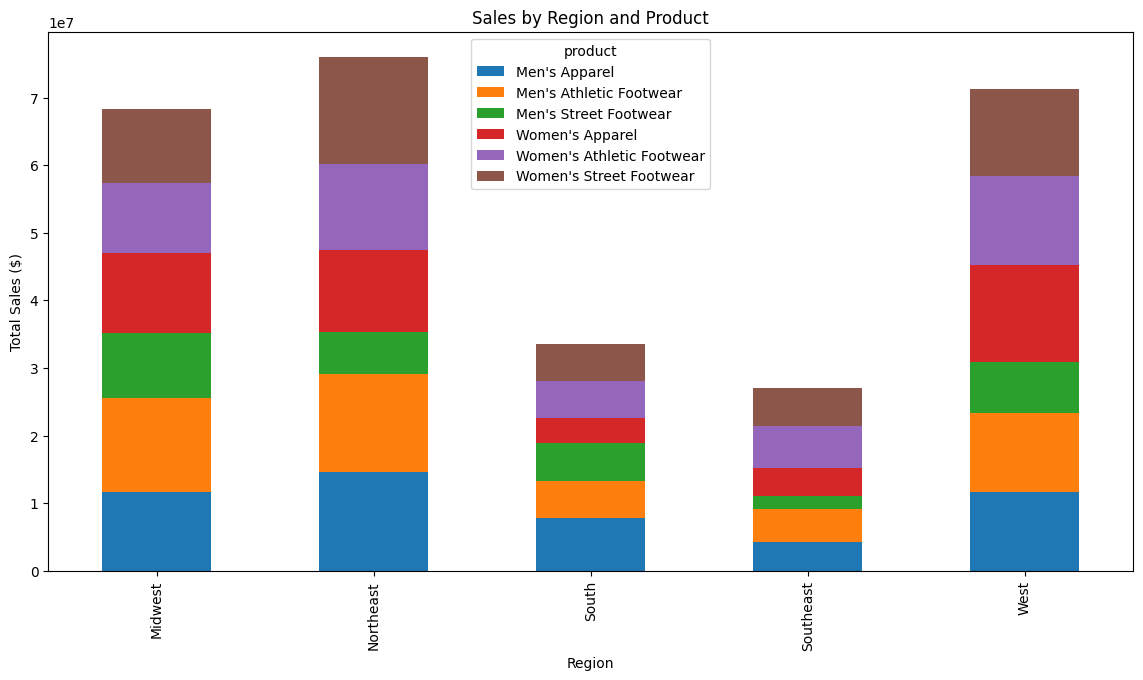

In [22]:
region_product_sales = data.groupby(['region', 'product'])['total_sales'].sum().unstack()
region_product_sales.plot(kind='bar', stacked=True, figsize=(14, 7))
plt.title('Sales by Region and Product')
plt.xlabel('Region')
plt.ylabel('Total Sales ($)')
plt.show()

### Key observations include:

**Men's and Women's Apparel:** Significant contributors across all regions, particularly in the ***West*** and ***Northeast***.

**Women's Street and Athletic Footwear:** Prominent in the ***Northeast*** but comparatively lower in the ***South*** and ***Southeast***.

**South and Southeast:** Overall lower contributions across all product categories.

### Recommendations:

**Targeted Marketing:** Focus on promoting footwear categories in the **South** and ***Southeast*** regions to balance sales distribution.

**Product-Specific Strategy:** Prioritize apparel products in high-performing regions like West and ***Northeast*** for further growth.

**Customer Insights:** Conduct surveys or gather customer feedback in underperforming regions to better tailor the product mix.

## 4.7 Product Analysis:

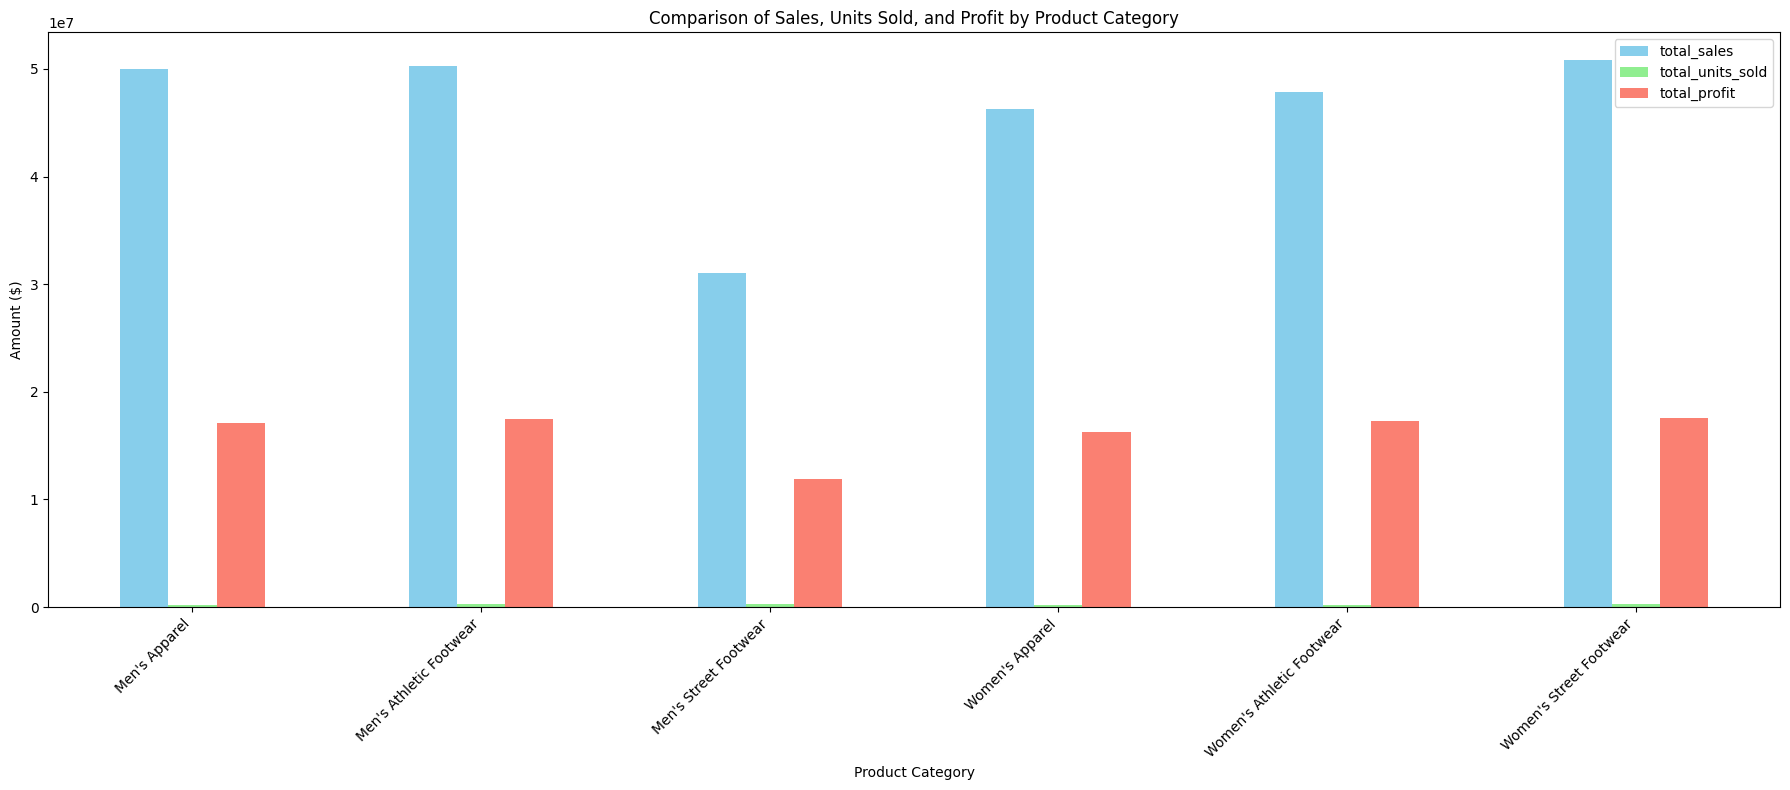

In [23]:
# Grouping the data by product category
category_summary = data.groupby('product').agg(
    total_sales=('total_sales', 'sum'),
    total_units_sold=('units_sold', 'sum'),
    total_profit=('operating_profit', 'sum')
).reset_index()

# Plotting the comparison across product categories
category_summary.set_index('product', inplace=True)

# Create a grouped bar chart
category_summary.plot(kind='bar', figsize=(18, 8), color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Comparison of Sales, Units Sold, and Profit by Product Category')
plt.ylabel('Amount ($)')
plt.xlabel('Product Category')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Analysis:

**Units Sold vs. Sales:** While overall sales figures are strong, the actual number of units sold is relatively low. This suggests that revenue is being driven more by higher-priced products rather than by sales volume.

**Category Insights:** Products like "Men's Athletic Footwear" and "Women's Athletic Footwear" seem to generate higher revenue per unit sold, pointing to premium pricing or strong demand for high-margin items.


### Recommendations:

**Increase Unit Sales:** Introduce promotions or bundle deals for categories with lower unit sales. This approach can encourage customers to purchase more without significantly impacting profit margins.

**Optimize Pricing:** If high prices are causing lower unit sales, test modest price reductions in specific categories to increase volume while maintaining healthy revenue.

**Offer Targeted Discounts:** Use targeted discounts to stimulate demand in underperforming categories, ensuring the discounts are strategic to protect profitability.


## 4.8 Sales Over Time by Product (Stacked Area Chart)

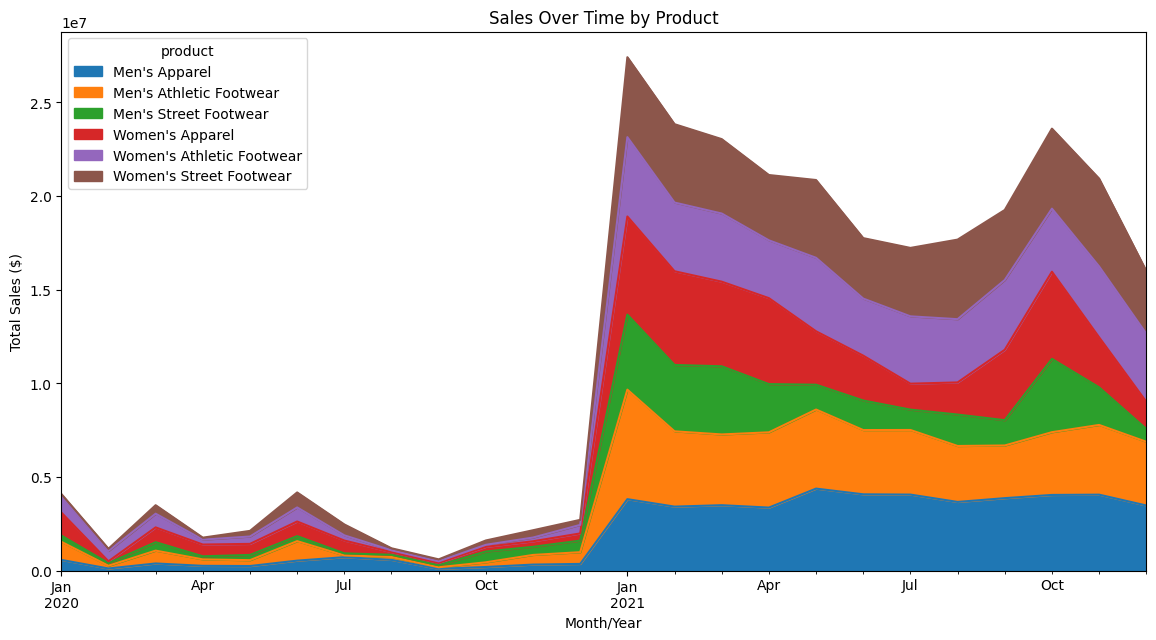

In [24]:
data['month_year'] = data['invoice_date'].dt.to_period('M')
product_time_sales = data.groupby(['month_year', 'product'])['total_sales'].sum().unstack()

product_time_sales.plot(kind='area', stacked=True, figsize=(14, 7))
plt.title('Sales Over Time by Product')
plt.xlabel('Month/Year')
plt.ylabel('Total Sales ($)')
plt.show()

### Key observations: 

**Sustained Growth:** After the spike, sales remain relatively high, indicating that demand was sustained, possibly due to a shift in consumer preferences or effective marketing strategies.

**Women's Street Footwear Leading:** Among the product categories, Women's Street Footwear seems to contribute significantly to the total sales post-spike, suggesting high demand in this segment.


### Recommendations:
**Investigate the January 2021 Spike:** Understand the reason behind this sudden growth (e.g., marketing campaigns, pricing strategies, external events) and replicate similar initiatives in the future.
	
**Capitalize on Women's Street Footwear:** Since this category is leading in sales, allocate more marketing and inventory resources to maximize its revenue potential.
	
**Seasonal Strategy:** If the spike aligns with a seasonal trend, plan for similar boosts in upcoming cycles by preparing inventory and marketing campaigns early.
	
**Diversify Growth:** Although certain categories are performing better, ensure steady support for other categories (e.g., Men's Apparel) to avoid over-reliance on a single segment.


## 4.9 Marketing Channel Analysis:


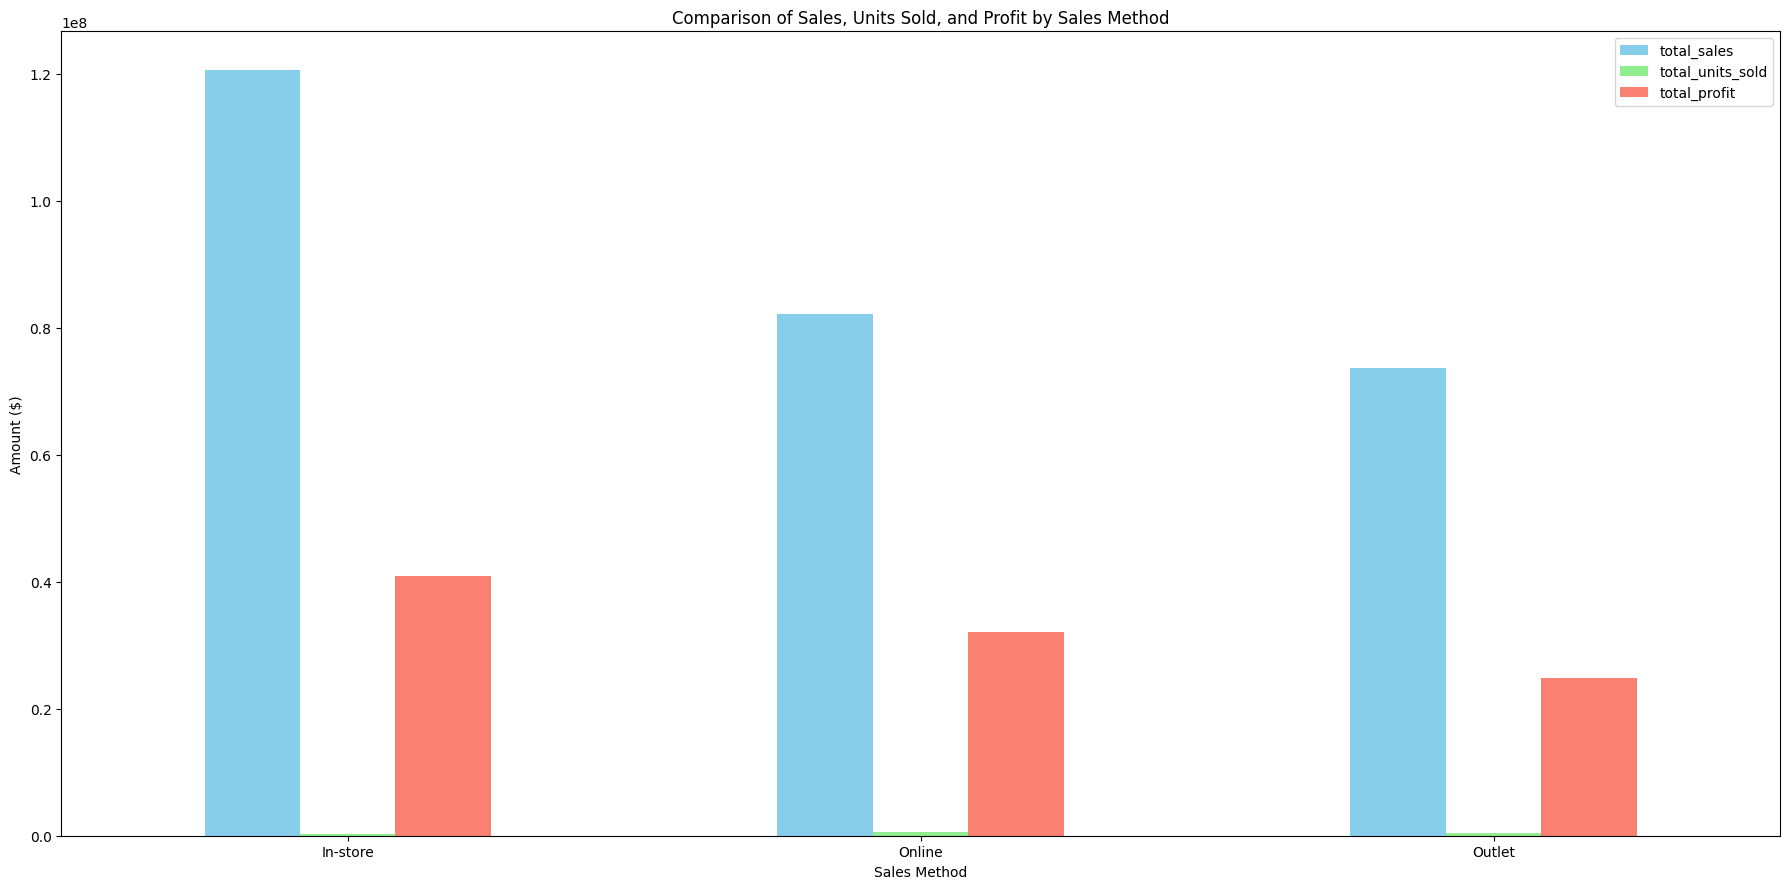

In [25]:
sales_by_method = data.groupby('sales_method').agg(
    total_sales=('total_sales', 'sum'),
    total_units_sold=('units_sold', 'sum'),
    total_profit=('operating_profit', 'sum')
).reset_index()

# Plotting the comparison across sales methods
sales_by_method.set_index('sales_method', inplace=True)

# Create a grouped bar chart
sales_by_method.plot(kind='bar', figsize=(18, 9), color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Comparison of Sales, Units Sold, and Profit by Sales Method')
plt.ylabel('Amount ($)')
plt.xlabel('Sales Method')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Analysis:

-In-store sales dominate revenue and profit; online has growth potential, while outlets need better margin optimization.

-Pricing is stable post-outlier handling, but channel-specific profit gaps exist.

-Bulk orders and discounts impact sales volume positively but require careful management for profitability.

### Recommendations

**Optimize Channels:** Boost online marketing, improve outlet cost efficiency, and maintain in-store strengths.

**Dynamic Pricing:** Adjust prices for premium and discounted products to maximize margins.

**Product Focus:** Promote high-performers and revamp underperformers.

**Operational Efficiency:** Replicate profitable strategies and cut costs in low-margin areas.

**Targeted Promotions:** Using seasonality insights and CLV to drive sales and customer loyalty which what we will see in future steps.

## 4.10 Seasonality of Sales

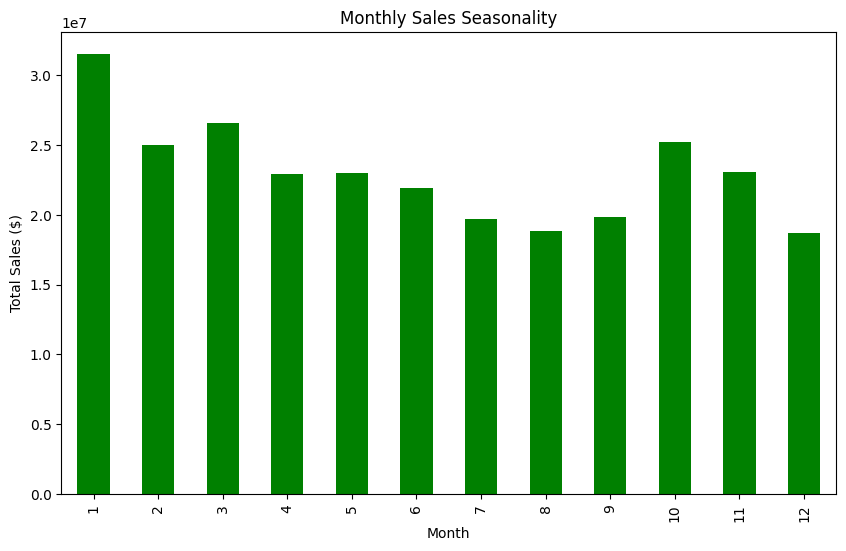

In [26]:
monthly_sales = data.groupby(data['invoice_date'].dt.month)['total_sales'].sum()
monthly_sales.plot(kind='bar', figsize=(10, 6), color='green')
plt.title('Monthly Sales Seasonality')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.show()


### Analysis:

**Top Performance:** The months of January and March are the highest grossing, which suggests seasonal demand or possibly a campaign effort.

**Low Activity:** During the middle of the year (From July to September) and also slightly in December sales drop significantly, indicating that high disengagement or off-peak shopping trends.

**Steady Sales:** February, April, and October have consistent sales volume – whether that means customers are actively buying and selling or people are simply not listing their homes during those months is yet to be determined.

### Recommendations:

**Capitalize on Peaks:** Book your most significant campaigns and promotions in January and March when demand should be peaking.

**Elevate Slow Months:** Hit up some promotions, seasonal discounts or campaigns for the months in July-Septembers to resuscitate sales during low times.

**Maintain Consistent Sales:** Fortify loyalty programs when customers spend most in Feb, Apr, and Oct

## 4.11 Sales Contribution by Product Category

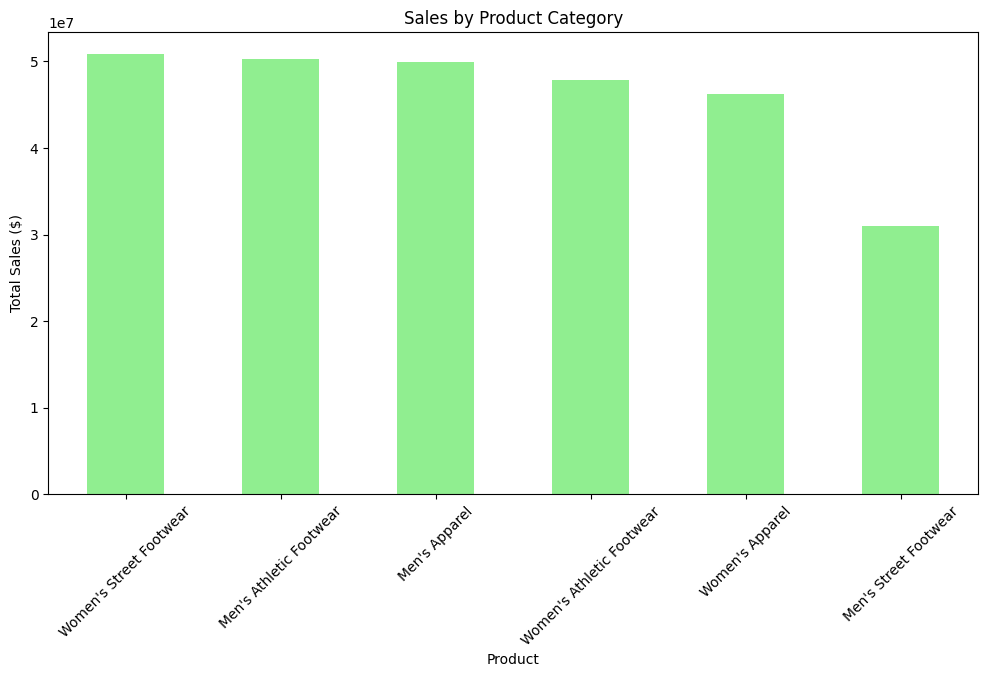

In [27]:
product_category_sales = data.groupby('product')['total_sales'].sum().sort_values(ascending=False)
product_category_sales.plot(kind='bar', figsize=(12, 6), color='lightgreen')
plt.title('Sales by Product Category')
plt.xlabel('Product')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.show()

##### Top Performers:

Top selling categories: Women's Street Footwear and Men's Athletic Footwear - these two have been in strong demand with consumers

Women and Athletic Apparel (men, women) are still selling at the same rate.

##### Low Performer:

Sales in the Men's Street Footwear is well below the next-lowest category; better marketing or product improvement may be necessary here.

### Recommendations

High Importance Categories Continue to build inventory, media and promotion in Women Street Footwear and Men Athletic Footwear before the finish line

Jumpstart Under-performing Categories:

Deeper inspection of Men’s Street Footwear, possible design or value issues.

Launch Promotions Or Bundle Offers To Perform Better

# 5. Customer segmentation


In [ ]:
data['invoice_date'] = pd.to_datetime(data['invoice_date'])
# Set 'today' to the most recent date in the dataset
today = data['invoice_date'].max()

# Aggregate data by retailer for RFM analysis
rfm = data.groupby('retailer').agg(
    Recency=('invoice_date', lambda x: (today - x.max()).days),  # Days since last purchase
    Frequency=('invoice_date', 'count'),                         # Total transactions
    Monetary=('total_sales', 'sum')                              # Total revenue
).reset_index()

print(rfm.head())

        retailer  Recency  Frequency    Monetary
0         Amazon        0        809  35356621.0
1    Foot Locker        0       2246  82543396.0
2         Kohl's        6        791  30015551.0
3  Sports Direct        6       1602  49057432.0
4        Walmart       15        477  13019007.0


**Keep High-Value Retailers:** Enhance loyalty programs and deliver targeted promotions for Foot Locker, Amazon

**Boost Recency:** Targeted campaigns for Kohl's and Sports Direct Reactivate Moderates

**Get Walmart to Play:** More discounts, more product fit and customer loss mitigation.

**Recency Improvement:** Leverage lifecycle based marketing to minimize inactivity for all retailers.

In [55]:
# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Apply MinMaxScaler to normalize the RFM columns
rfm_normalized = rfm.copy()
rfm_normalized[['Recency', 'Frequency', 'Monetary']] = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

# Display the normalized RFM table
print(rfm_normalized.head())


        retailer  Recency  Frequency  Monetary  Cluster           CLV
0         Amazon      0.0   0.187677  0.321292        0  2.860351e+10
1    Foot Locker      0.0   1.000000  1.000000        2  1.853925e+11
2         Kohl's      0.4   0.177501  0.244469        0  2.374230e+10
3  Sports Direct      0.4   0.635953  0.518357        1  7.859001e+10
4        Walmart      1.0   0.000000  0.000000        0  6.210066e+09


c:\Users\Ismail Touati\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Ismail Touati\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


   Cluster  Recency_Mean  Frequency_Mean  Monetary_Mean  Count
0        0           7.0      692.333333     26130393.0      3
1        1           7.0     1751.500000     57656477.0      2
2        2           0.0     2246.000000     82543396.0      1


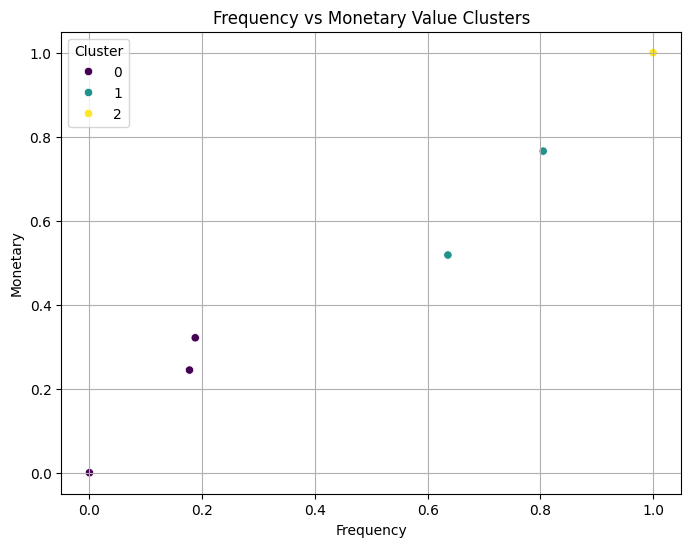

In [30]:
# Apply K-Means Clustering with a smaller number of clusters
kmeans = KMeans(n_clusters=3, random_state=42)
rfm_normalized['Cluster'] = kmeans.fit_predict(rfm_normalized[['Recency', 'Frequency', 'Monetary']])

# Add the cluster labels to the original RFM table
rfm['Cluster'] = rfm_normalized['Cluster']



# Analyze clusters
cluster_analysis = rfm.groupby('Cluster').agg(
    Recency_Mean=('Recency', 'mean'),
    Frequency_Mean=('Frequency', 'mean'),
    Monetary_Mean=('Monetary', 'mean'),
    Count=('retailer', 'count')
).reset_index()

print(cluster_analysis)

# Visualize the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=rfm_normalized['Frequency'], 
    y=rfm_normalized['Monetary'], 
    hue=rfm_normalized['Cluster'], 
    palette='viridis'
)
plt.title('Frequency vs Monetary Value Clusters')
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.grid()
plt.show()


### Analysis of Clusters:

#### Cluster 0 (Moderate Retailers):

Recency: Average (7 days since last purchase).

Frequency: Low (692 transactions on average).

Monetary: Moderate ($26.1M).

Count: 3 retailers.

#### Cluster 1 (Strong Performers):

Recency: Average (7 days since last purchase).

Frequency: High (1,751 transactions on average).

Monetary: High ($57.6M).

Count: 2 retailers.

#### Cluster 2 (Top Performer):

Recency: Best (0 days, highly active).

Frequency: Highest (2,246 transactions).

Monetary: Highest ($82.5M).

Count: 1 retailer.


# 6. Customer lifetime value (CLV)

## 6.1 Calculate CLV:

In [56]:
# Calculate CLV: Frequency * Monetary
rfm['CLV'] = rfm['Frequency'] * rfm['Monetary']

# Display the first few rows to check the CLV
print(rfm[['retailer', 'Frequency', 'Monetary', 'CLV']].head())


        retailer  Frequency    Monetary           CLV
0         Amazon        809  35356621.0  2.860351e+10
1    Foot Locker       2246  82543396.0  1.853925e+11
2         Kohl's        791  30015551.0  2.374230e+10
3  Sports Direct       1602  49057432.0  7.859001e+10
4        Walmart        477  13019007.0  6.210066e+09


## 6.2 Plot CLV: 

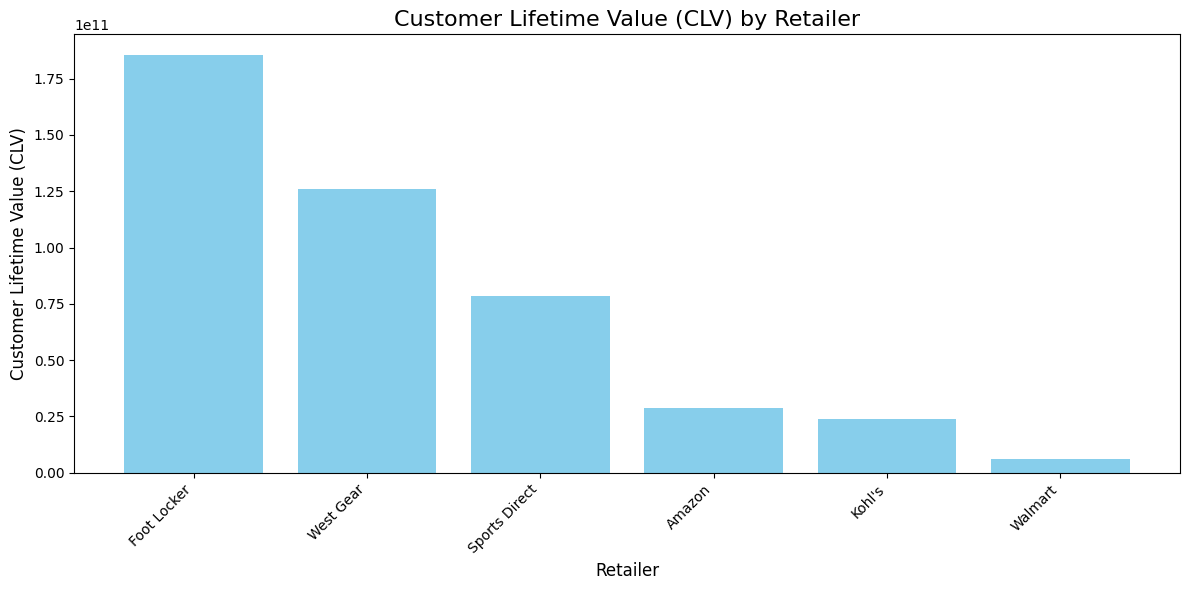

In [32]:
# Sort by CLV to highlight top customers
rfm_sorted = rfm.sort_values(by='CLV', ascending=False)

# Plot CLV for each retailer
plt.figure(figsize=(12, 6))
plt.bar(rfm_sorted['retailer'], rfm_sorted['CLV'], color='skyblue')
plt.title('Customer Lifetime Value (CLV) by Retailer', fontsize=16)
plt.xlabel('Retailer', fontsize=12)
plt.ylabel('Customer Lifetime Value (CLV)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### Analysis:

#### Foot Locker:

The highest CLV ($185.39B) due to its combination of the highest Frequency and Monetary values.

Indicates it is a critical retailer for your business.

#### West Gear:

Second-highest CLV ($125.95B), driven by high Frequency and substantial Monetary values.

Focus on maintaining their high engagement and purchases.
#### Walmart:

Lowest CLV ($6.21B), which is expected due to low Frequency and low Monetary values.

Walmart may need targeted strategies to boost engagement and spending.

#### Amazon, Kohl's, and Sports Direct:

Moderate to high CLV values.
These retailers perform consistently and could benefit from slight enhancements in frequency or monetary contributions.

### Recommendations:

**High CLV Retailers (Foot Locker, West Gear):**

Prioritize these key accounts with premium stimulus, tailored marketing, and powerful supply chain support.

Maintain and potentially increase their high levels of transactions and revenue.

**Low CLV Retailers (Walmart):**

Investigate the root causes of lower frequency and monetary contributions.

Use loyalty programs, targeted promotions, or exclusive product lines to drive engagement.

**Moderate CLV Retailers (Amazon, Kohl's, Sports Direct)**

Explore ways to either increase frequency like new products or raise the average revenue per transaction.

These retailers have room for growth and can potentially move into the high CLV category.

# ------------------------------------ **Conclusion**------------------------------------

**Foot Locker** and **West Gear** are our top performers, driving strong loyalty and revenue. **Walmart** needs some attention to re-engage customers and boost sales. Retailers like **Amazon**, **Kohl's**, and **Sports Direct** have great potential to grow with the right strategies, like increasing how often customers shop or raising purchase values. Moving forward, let’s focus on keeping our top performers strong, helping low contributors improve, and capitalizing on seasonal trends for better results.


# ------------------------------------ **THANK YOU ^_^**------------------------------------